# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [1]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [2]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

In [4]:
data.isna().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Recommended IND            0
dtype: int64

In [5]:
data.dtypes


Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
Recommended IND             int64
dtype: object

In [20]:
y.value_counts()

Recommended IND
1    15053
0     3389
Name: count, dtype: int64

In [23]:
data.Age.describe()

count    18442.000000
mean        43.383635
std         12.246264
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

In [58]:
bins = [17, 30, 40, 50, 60, 99]
labels = ['18-30', '31-40', '41-50', '51-60', '60+']

X = X.copy()
X['Age_Group'] = pd.cut(X['Age'], bins=bins, labels=labels)
X_train = X_train.copy()
X_test = X_test.copy()
X_train['Age_Group'] = pd.cut(X_train['Age'], bins=bins, labels=labels)
X_test['Age_Group'] = pd.cut(X_test['Age'], bins=bins, labels=labels)

### Get num, cat and text feats

In [25]:
num_features = (
    X.select_dtypes(include='number').columns
    .drop(['Clothing ID', 'Age'])
)
print('Numerical features:', num_features)

cat_features = (
    X[[
        'Clothing ID',
        'Division Name',
        'Department Name',
        'Class Name',
        'Age_Group'
    ]].columns
)
print('Categorical features:', cat_features)


text_features = (
    X[[col for col in list(X.columns) if (col not in num_features) and (col not in cat_features)]].columns
)
print ('Text features:', text_features)

Numerical features: Index(['Positive Feedback Count'], dtype='object')
Categorical features: Index(['Clothing ID', 'Division Name', 'Department Name', 'Class Name',
       'Age_Group'],
      dtype='object')
Text features: Index(['Age', 'Title', 'Review Text'], dtype='object')


### Discovery on num_feats

In [40]:
data['Positive Feedback Count'].describe()

count    18442.000000
mean         2.697484
std          5.942220
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64

### Discovery on cat_feats

In [26]:
for feat in cat_features:
    print(feat)
    print(X[feat].nunique())

Clothing ID
531
Division Name
2
Department Name
6
Class Name
14
Age_Group
5


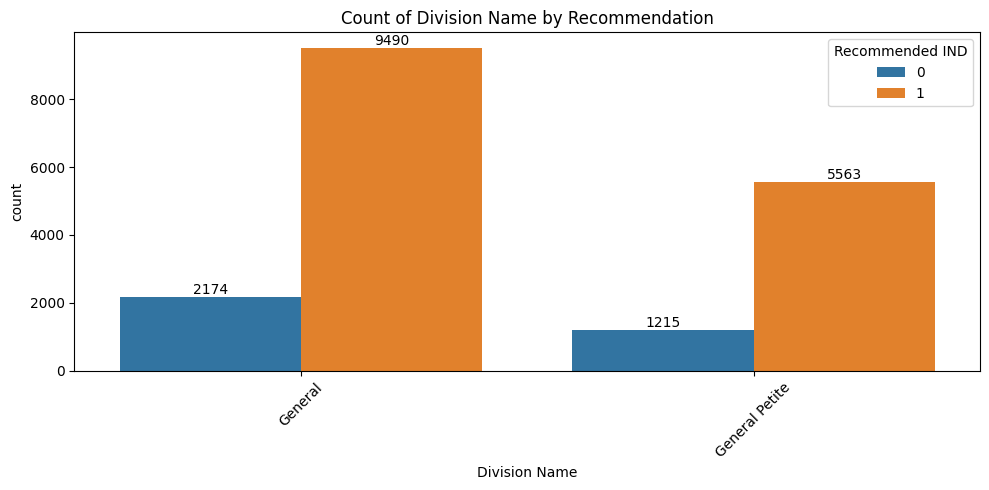

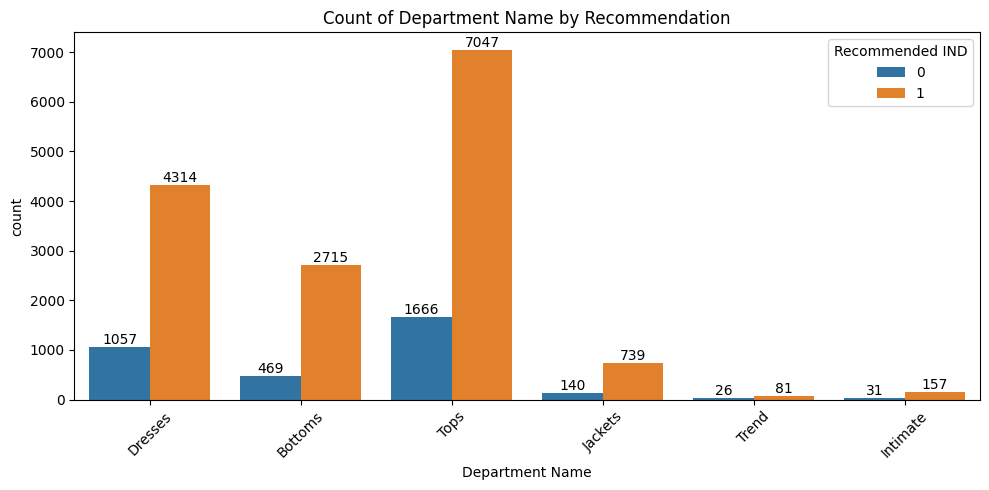

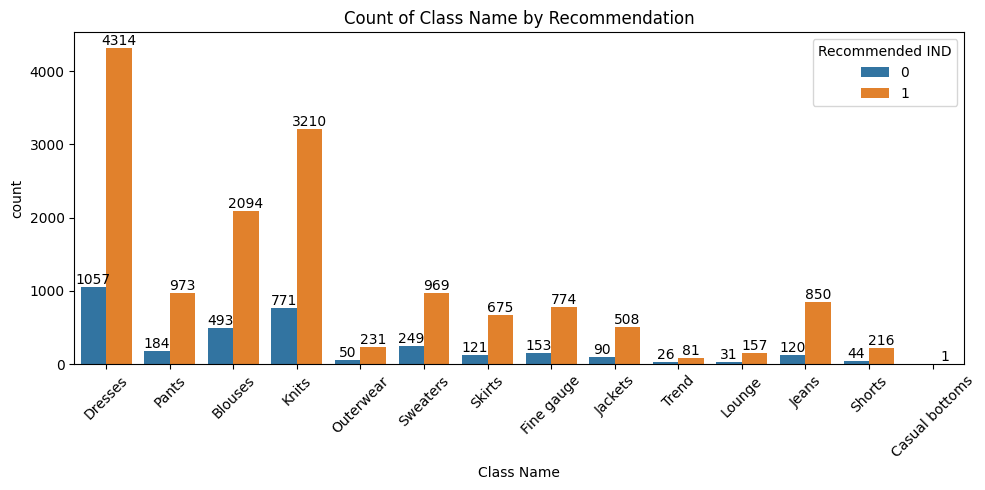

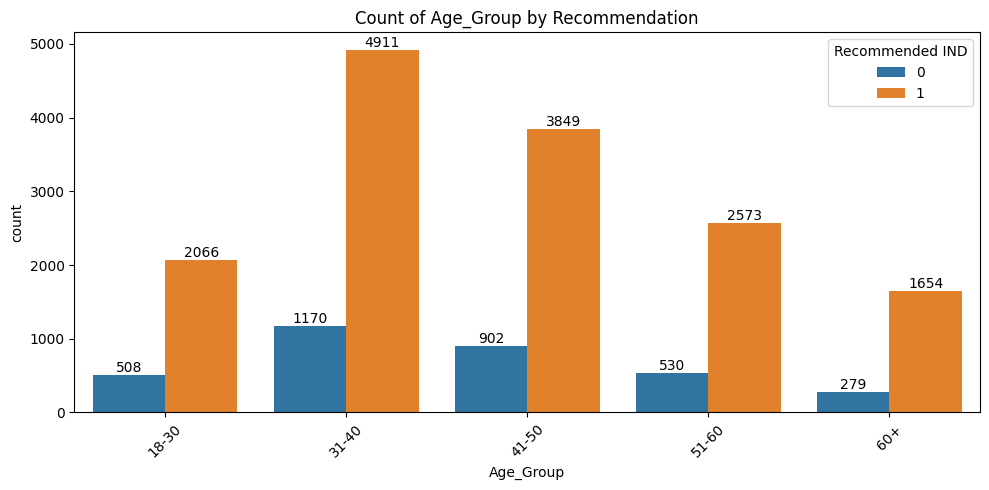

In [27]:
for feat in cat_features:
    if feat != 'Clothing ID':
        plt.figure(figsize=(10, 5))
        ax = sns.countplot(data=X, x=feat, hue=y)
        plt.title(f'Count of {feat} by Recommendation')
        plt.xticks(rotation=45)
        
        # Add count annotations
        for container in ax.containers:
            ax.bar_label(container, fmt='%d')
        
        plt.tight_layout()  # Adjust layout to prevent label cutoff
        plt.show()

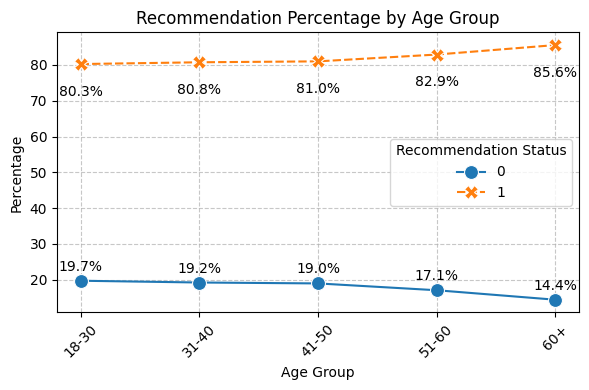

In [38]:
# Calculate percentages of recommendations for each age group
age_recs = pd.crosstab(X['Age_Group'], y, normalize='index') * 100

plt.figure(figsize=(6, 4))
ax = sns.lineplot(data=age_recs, markers=True, markersize=10)

# Add percentage annotations
for idx, age_group in enumerate(age_recs.index):
    for col in [0, 1]:  # 0 for Not Recommended, 1 for Recommended
        val = age_recs.iloc[idx, col]
        y_offset = -15 if col == 1 else 5
        ax.annotate(f'{val:.1f}%', 
                   xy=(age_group, val),
                   xytext=(0, y_offset),
                   textcoords='offset points',
                   ha='center',
                   va='bottom' if col == 0 else 'top')

plt.title('Recommendation Percentage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.legend(title='Recommendation Status',)
plt.tight_layout()
plt.show()

## Building Pipeline

### Num_feats pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

In [42]:
num_pipeline

Pipeline(steps=[('scaler', MinMaxScaler())])

### Cat_feats pipeline

In [43]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

cat_pipeline = Pipeline([
    (
        'ordinal_encoder',
        OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=-1,
        )
    ),
    (
        'cat_encoder',
        OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore',
        )
    ),
])

In [44]:
cat_pipeline

Pipeline(steps=[('ordinal_encoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('cat_encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

### Text_feats pipeline

In [46]:
! python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.2/12.8 MB 3.9 MB/s eta 0:00:04
     ----- ---------------------------------- 1.7/12.8 MB 17.6 MB/s eta 0:00:01
     -------------- ------------------------- 4.7/12.8 MB 33.0 MB/s eta 0:00:01
     --------------------- ------------------ 6.8/12.8 MB 39.5 MB/s eta 0:00:01
     ---------------------------- ----------- 9.0/12.8 MB 41.0 MB/s eta 0:00:01
     ------------------------------------ -- 12.0/12.8 MB 59.5 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB 54.7 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 43.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin

class ExtractPOSFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, nlp, pos_tags=None):
        self.nlp = nlp
        self.pos_tags = pos_tags if pos_tags is not None else ['ADJ', 'VERB', 'NOUN', 'ADV']

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # If X is a DataFrame, process each column and concatenate features
        if isinstance(X, pd.DataFrame):
            features = []
            for col in X.columns:
                pos_counts = [
                    {tag: sum(1 for token in doc if token.pos_ == tag)
                     for tag in self.pos_tags}
                    for doc in self.nlp.pipe(X[col].astype(str))
                ]
                df = pd.DataFrame(pos_counts)
                df.columns = [f'{col}_POS_{tag}' for tag in self.pos_tags]
                features.append(df.reset_index(drop=True))
            return pd.concat(features, axis=1)
        else:
            # If X is a Series or array
            pos_counts = [
                {tag: sum(1 for token in doc if token.pos_ == tag)
                 for tag in self.pos_tags}
                for doc in self.nlp.pipe(pd.Series(X).astype(str))
            ]
            features_df = pd.DataFrame(pos_counts)
            features_df.columns = [f'POS_{tag}' for tag in self.pos_tags]
            return features_df

class ExtractEntityFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, nlp, entity_types=None):
        self.nlp = nlp
        self.entity_types = entity_types if entity_types is not None else ['PRODUCT', 'ORG', 'GPE', 'MONEY']

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # If X is a DataFrame, process each column and concatenate features
        if isinstance(X, pd.DataFrame):
            features = []
            for col in X.columns:
                ent_counts = [
                    {ent_type: sum(1 for ent in doc.ents if ent.label_ == ent_type)
                     for ent_type in self.entity_types}
                    for doc in self.nlp.pipe(X[col].astype(str))
                ]
                df = pd.DataFrame(ent_counts)
                df.columns = [f'{col}_ENT_{ent_type}' for ent_type in self.entity_types]
                # Add entity ratio feature
                df[f'{col}_ENT_RATIO'] = [
                    len(doc.ents) / len(doc) if len(doc) > 0 else 0
                    for doc in self.nlp.pipe(X[col].astype(str))
                ]
                features.append(df.reset_index(drop=True))
            return pd.concat(features, axis=1)
        else:
            # If X is a Series or array
            ent_counts = [
                {ent_type: sum(1 for ent in doc.ents if ent.label_ == ent_type)
                 for ent_type in self.entity_types}
                for doc in self.nlp.pipe(pd.Series(X).astype(str))
            ]
            features_df = pd.DataFrame(ent_counts)
            features_df.columns = [f'ENT_{ent_type}' for ent_type in self.entity_types]
            features_df['ENT_RATIO'] = [
                len(doc.ents) / len(doc) if len(doc) > 0 else 0
                for doc in self.nlp.pipe(pd.Series(X).astype(str))
            ]
            return features_df

### Combine pipelines

In [65]:
from sklearn.compose import ColumnTransformer

feature_engineering = ColumnTransformer([
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features),
        ('text_pos', ExtractPOSFeatures(nlp), text_features),
        ('text_ent', ExtractEntityFeatures(nlp), text_features),
])

## Training Pipeline

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

model_pipeline = make_pipeline(
    feature_engineering,
    RandomForestClassifier(random_state=42),
)

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Positive Feedback Count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=Fal...
                                                  ExtractPOSFeatures(nlp=<spacy.lang.en.English object at 0x0000028B47CBAA90>,
                                                                     pos_tags=['ADJ',
                                                                               'VERB',
                                                                               'NOUN',
                                                                               'ADV']),
                                                  Index(['Age', 'Title', 'Review Text'], dtype='object')),
                                                 ('text_ent',
                                                  ExtractEntityFeatures(entity_types=['PRODUCT',
                                                                                      'ORG',
                                                                                      'GPE',
                                                                                      'MONEY'],
                                                                        nlp=<spacy.lang.en.English object at 0x0000028B47CBAA90>),
                                                  Index(['Age', 'Title', 'Review Text'], dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [67]:
y_pred_forest_pipeline = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]  # Get probability for positive class

Accuracy: 0.823
AUC Score: 0.642


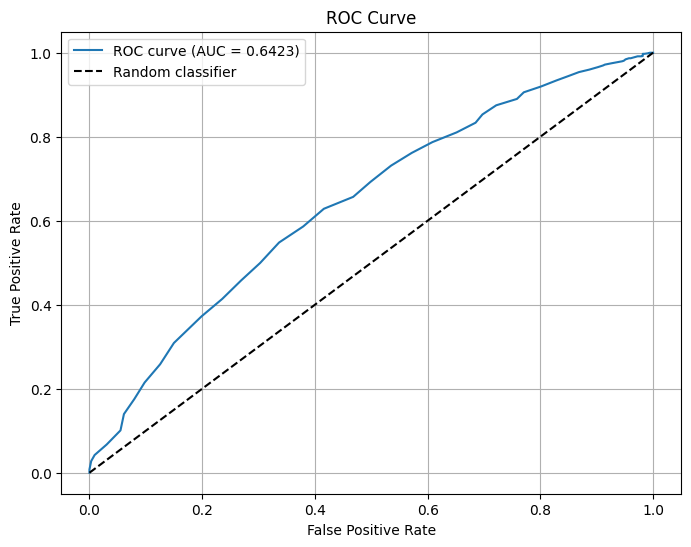

In [68]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Calculate metrics
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f'Accuracy: {accuracy_forest_pipeline:.3f}')
print(f'AUC Score: {auc_score:.3f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## Fine-Tuning Pipeline

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

my_distributions = dict(
    randomforestclassifier__max_features=[
        100,
        150,
        250,
    ],
    randomforestclassifier__n_estimators=[
        100,
        150,
    ],
    randomforestclassifier__max_depth=[
        5,
        10,
        15,
    ],
)

param_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=my_distributions,
    n_iter=5,     # Try 5 different combinations of parameters
    cv=3,         # Use 3-fold cross-validation
    n_jobs=-1,    # Use all available processors (for multiprocessing)
    refit=True,   # Refit the model using the best parameters found
    verbose=3,    # Output of parameters, score, time
    random_state=42,
)

param_search.fit(X_train, y_train)

# Retrieve the best parameters
param_search.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [ ]:
model_best = param_search.best_estimator_
model_best

In [ ]:
y_pred_cv = model_best.predict(X_test)
y_pred_proba_cv = model_best.predict_proba(X_test)[:, 1]

accuracy_cv = accuracy_score(y_test, y_pred_cv)
auc_score_cv = roc_auc_score(y_test, y_pred_proba_cv)

print('Accuracy:', accuracy_cv)
print(f'AUC Score: {auc_score_cv:.3f}')